In [3]:
import warnings
import os
import gtfs_kit as gk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
import plot_style

In [18]:
import json

# Load the JSON data
with open('grenoble_stop.json', 'r') as f:
    stops = json.load(f)

# Extract lon and lat as a list of tuples
coordinates = [(stop['lon'], stop['lat']) for stop in stops if 'lon' in stop and 'lat' in stop]

# Print results
print(f"Found {len(coordinates)} coordinate pairs:")
for i, (lon, lat) in enumerate(coordinates):
    print(f"  {i+1}. lon={lon}, lat={lat}")

# Alternative: as a list of dictionaries
coordinates_dict = [{'lon': stop['lon'], 'lat': stop['lat']} for stop in stops if 'lon' in stop and 'lat' in stop]

# Alternative: separate lists
long = [stop['lon'] for stop in stops if ('lon' in stop ) and (stop['lat'] < 45.22) and (stop['lat'] > 45.11)]
lat = [stop['lat'] for stop in stops if ('lat' in stop) and (stop['lat'] < 45.22) and (stop['lat'] > 45.11)]

print(f"\nLongitudes: {long[:5]}...")  # Show first 5
print(f"Latitudes: {lat[:5]}...")    # Show first 5


Found 399 coordinate pairs:
  1. lon=5.67222, lat=45.19709
  2. lon=5.68009, lat=45.19385
  3. lon=5.68727, lat=45.19134
  4. lon=5.69409, lat=45.18912
  5. lon=5.69844, lat=45.18909
  6. lon=5.7058, lat=45.18849
  7. lon=5.71351, lat=45.18833
  8. lon=5.71554, lat=45.19078
  9. lon=5.7193, lat=45.18911
  10. lon=5.72499, lat=45.18938
  11. lon=5.72822, lat=45.1902
  12. lon=5.73144, lat=45.1883
  13. lon=5.73177, lat=45.18466
  14. lon=5.73167, lat=45.18168
  15. lon=5.73179, lat=45.179
  16. lon=5.73203, lat=45.17349
  17. lon=5.73229, lat=45.16928
  18. lon=5.73118, lat=45.16635
  19. lon=5.73047, lat=45.16359
  20. lon=5.73265, lat=45.15922
  21. lon=5.73384, lat=45.15715
  22. lon=5.72781, lat=45.15696
  23. lon=5.72192, lat=45.15846
  24. lon=5.71909, lat=45.15588
  25. lon=5.71848, lat=45.15302
  26. lon=5.71818, lat=45.14948
  27. lon=5.71704, lat=45.14523
  28. lon=5.71527, lat=45.14292
  29. lon=5.71307, lat=45.13832
  30. lon=5.7083, lat=45.13671
  31. lon=5.7033, lat=45.137

In [22]:
xmin, xmax, ymin, ymax = 2.14, 2.54, 48.725, 48.98
dx_min, dx_max, dy_min, dy_max = 0., 0.0, 0.0, 0.00

markersize = 2

title = "Grenoble metros and bus stations"
hist_title = "Distance distribution between stations"

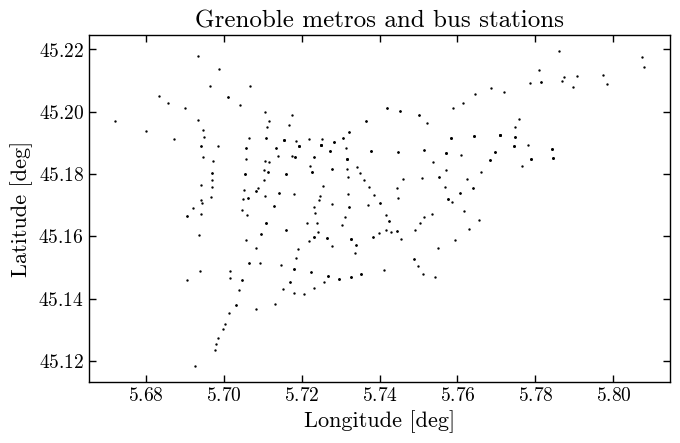

In [23]:
plt.scatter(long, lat, color='k', s=markersize, marker='.', alpha=1)



plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)

# plt.axline([5.66,45.22], slope=0, color='gray', linestyle='--', linewidth=1)
# plt.axline([5.66,45.11], slope=0, color='gray', linestyle='--', linewidth=1)

plt.title(title)
plt.show()

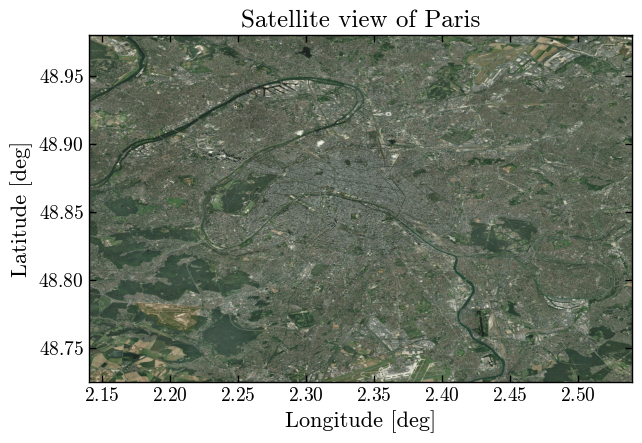

In [7]:
# plt.scatter(long, lat, color='k', s=markersize, marker='.')

paris_satellite_view = "export.png"
a = plt.imread(paris_satellite_view)
plt.imshow(a, extent=[xmin+dx_min, xmax+dx_max, ymin+dy_min, ymax+dy_max], alpha=0.9)  

plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.title("Satellite view of Paris")

plt.show()

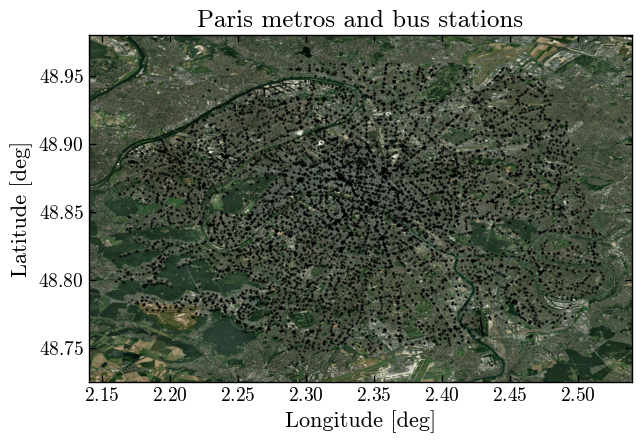

In [8]:
plt.scatter(long, lat, color='k', s=markersize, marker='.', alpha=0.7)

paris_satellite_view = "export.png"
a = plt.imread(paris_satellite_view)
plt.imshow(a, extent=[xmin+dx_min, xmax+dx_max, ymin+dy_min, ymax+dy_max], alpha=1)  

plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.title(title)

plt.show()

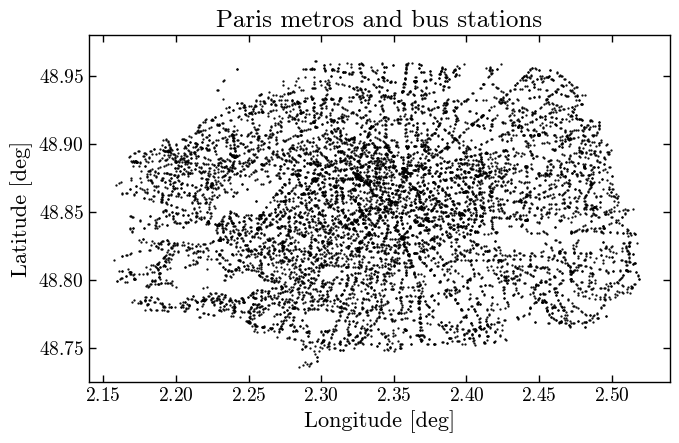

In [9]:
plt.scatter(long, lat, color='k', s=markersize, marker='.')

# plt.scatter([], [], color='k', s=50, marker='.', label="Stations")
# plt.legend(loc='upper left')

plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.title(title)
plt.show()

# Computing correlation function

#### Example of 1 point correlating

In [10]:
# Calculate dx and dy in kilometers relative to the center
from math import radians, cos

def degrees_to_km(degrees, latitude):
    R = 6371  # Earth radius in kilometers
    return degrees * (R * radians(1)) * cos(radians(latitude))

center_long = (xmin + xmax) / 2
center_lat = (ymin + ymax) / 2

filtered_stops['dx_km'] = filtered_stops['stop_lon'].apply(lambda lon: degrees_to_km(lon - center_long, center_lat))
filtered_stops['dy_km'] = filtered_stops['stop_lat'].apply(lambda lat: degrees_to_km(lat - center_lat, center_lat))

dx_km = filtered_stops['dx_km']
dy_km = filtered_stops['dy_km']

/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/3084041008.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stops['dx_km'] = filtered_stops['stop_lon'].apply(lambda lon: degrees_to_km(lon - center_long, center_lat))
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/3084041008.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stops['dy_km'] = filtered_stops['stop_lat'].apply(lambda lat: degrees_to_km(lat - center_lat, center_lat))


In [11]:
dx_km

0         4.093246
3        -0.496021
4        -0.083579
5        12.583922
7        12.477626
           ...    
35998    -1.121671
36003     1.419090
36004     1.440055
36005     1.999065
36006    10.182944
Name: dx_km, Length: 10624, dtype: float64

In [12]:
dx_km[0]

np.float64(4.093245830980592)

In [13]:
dx_km.iloc[1]

np.float64(-0.4960206298846703)

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/632487691.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/632487691.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


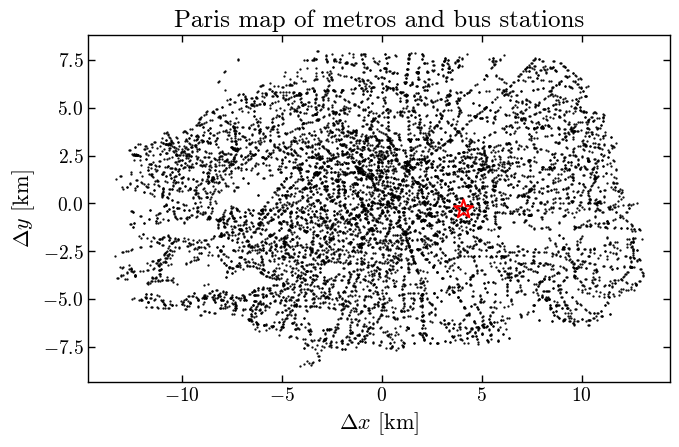

In [14]:
plt.scatter(dx_km, dy_km, color='k', s=markersize, marker='.')

plt.scatter(dx_km.iloc[0], dy_km.iloc[0], facecolors='none', edgecolors='red', s=200, marker='*',  linewidths=1.5)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title("Paris map of metros and bus stations")
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/4151496956.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/4151496956.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


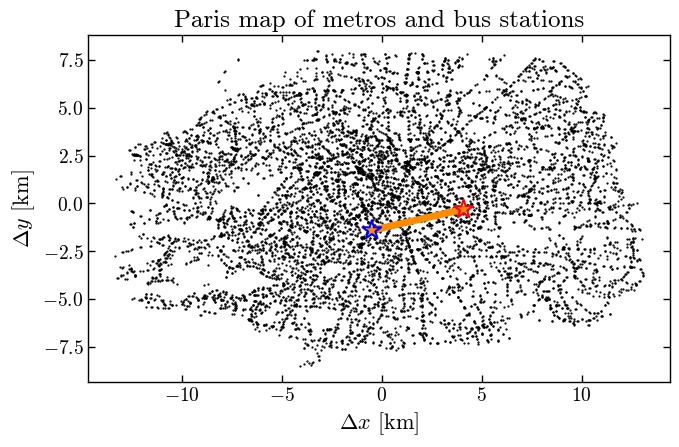

In [15]:
plt.scatter(dx_km, dy_km, color='k', s=markersize, marker='.', zorder=1)

plt.plot((dx_km.iloc[0], dx_km.iloc[1]), (dy_km.iloc[0], dy_km.iloc[1]), 
        color='darkorange', linewidth=5, zorder=2)

plt.scatter(dx_km.iloc[0], dy_km.iloc[0],
            facecolors='none', edgecolors='red', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.scatter(dx_km.iloc[1], dy_km.iloc[1],
            facecolors='none', edgecolors='blue', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title("Paris map of metros and bus stations")
plt.show()

In [16]:
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

distance = calculate_distance(dx_km.iloc[0], dy_km.iloc[0], dx_km.iloc[1], dy_km.iloc[1])

In [17]:
# bins = np.arange(0, 20.1, 0.5)

bins = np.arange(0, 10.1, 0.1)
print(bins)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


In [18]:
bins = np.linspace(0., 2., 51)
print(bins)

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08
 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64
 1.68 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.  ]


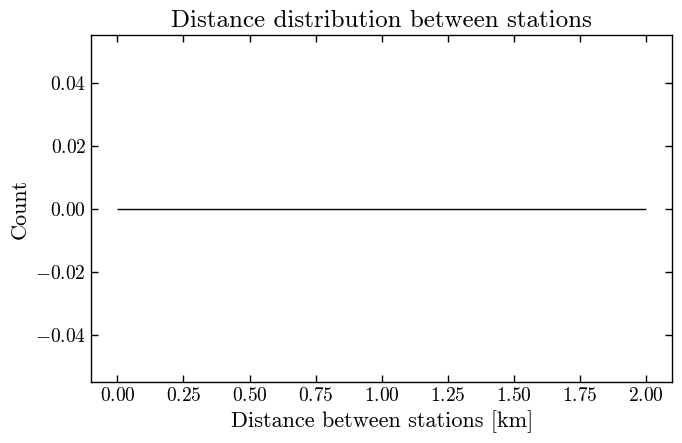

In [19]:
plt.hist([distance], bins=bins, color='skyblue', edgecolor='black', histtype='step')

plt.xlabel('Distance between stations [km]')
plt.ylabel('Count')
plt.title(hist_title)
plt.show()

In [20]:
pt2 = 3

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/1056783270.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/1056783270.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


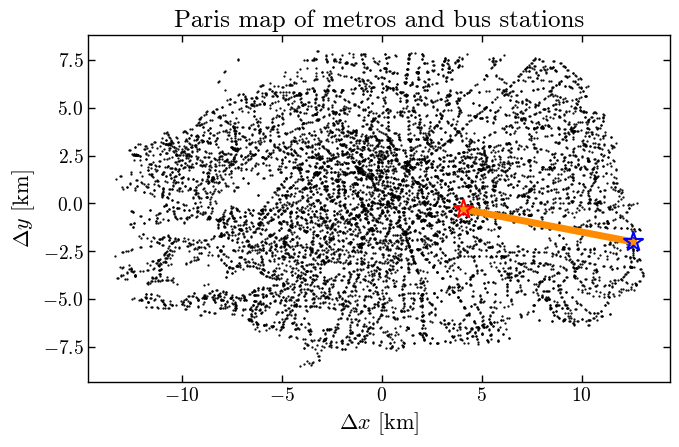

In [21]:
plt.scatter(dx_km, dy_km, color='k', s=markersize, marker='.', zorder=1)

plt.plot((dx_km.iloc[0], dx_km.iloc[pt2]), (dy_km.iloc[0], dy_km.iloc[pt2]), 
        color='darkorange', linewidth=5, zorder=2)

plt.scatter(dx_km.iloc[0], dy_km.iloc[0],
            facecolors='none', edgecolors='red', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.scatter(dx_km.iloc[pt2], dy_km.iloc[pt2],
            facecolors='none', edgecolors='blue', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title("Paris map of metros and bus stations")
plt.show()

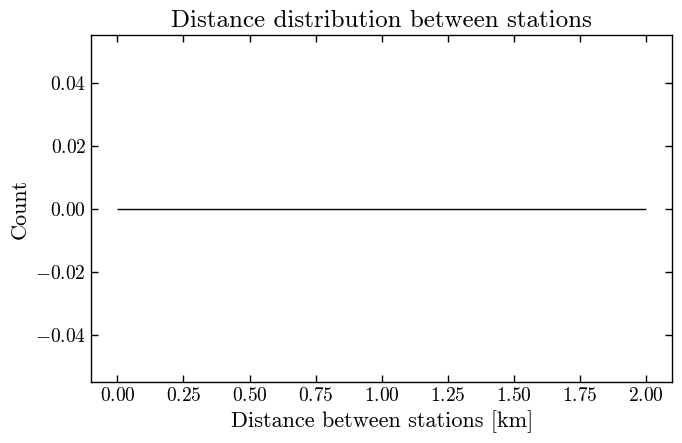

In [22]:
distance2 = calculate_distance(dx_km.iloc[0], dy_km.iloc[0], dx_km.iloc[pt2], dy_km.iloc[pt2])

plt.hist([distance, distance2], bins=bins, color='skyblue', edgecolor='black', histtype='step')

plt.xlabel('Distance between stations [km]')
plt.ylabel('Count')
plt.title(hist_title)
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/228396484.py:16: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/228396484.py:17: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


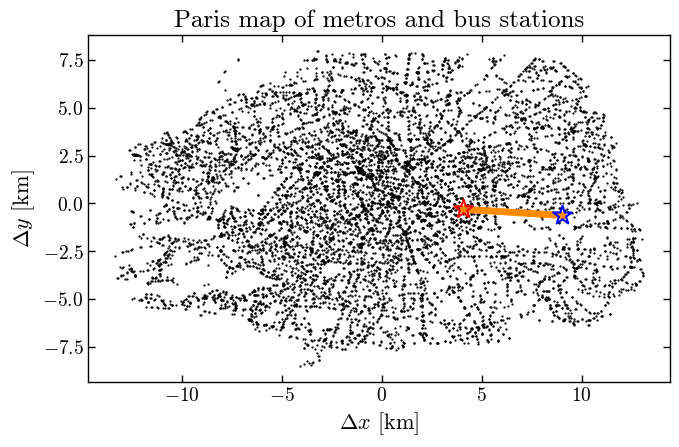

4.719468082098837 8.661127353805874 4.956230214022746


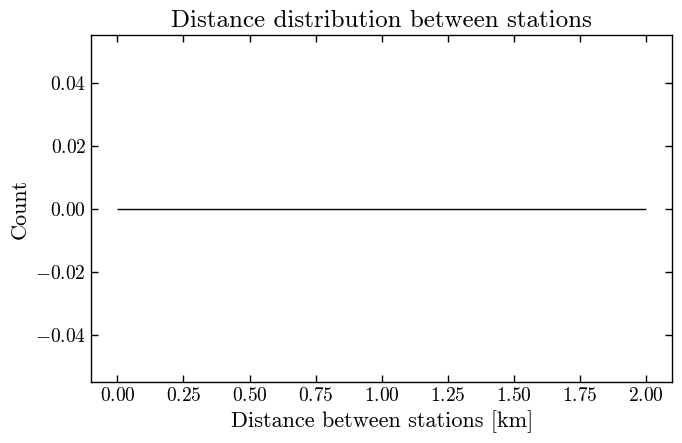

In [23]:
pt3 = 12

plt.scatter(dx_km, dy_km, color='k', s=markersize, marker='.', zorder=1)

plt.plot((dx_km.iloc[0], dx_km.iloc[pt3]), (dy_km.iloc[0], dy_km.iloc[pt3]), 
        color='darkorange', linewidth=5, zorder=2)

plt.scatter(dx_km.iloc[0], dy_km.iloc[0],
            facecolors='none', edgecolors='red', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.scatter(dx_km.iloc[pt3], dy_km.iloc[pt3],
            facecolors='none', edgecolors='blue', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title("Paris map of metros and bus stations")
plt.show()


distance3 = calculate_distance(dx_km.iloc[0], dy_km.iloc[0], dx_km.iloc[pt3], dy_km.iloc[pt3])

print(distance, distance2, distance3)
plt.hist([distance, distance2, distance3], bins=bins, color='skyblue', edgecolor='black', histtype='step')

plt.xlabel('Distance between stations [km]')
plt.ylabel('Count')
plt.title(hist_title)
plt.show()

In [24]:
from tqdm import tqdm

In [ ]:
edges = bins
# positions.shape = (N, 2)
# positions[:, 0] is x, positions[:, 1] is y
# Count pairs of points within a distance range
def pair_count_2d(positions, edges):
    counts = np.zeros(len(edges))
    for i in tqdm(range(positions.shape[0])):
        for j in range(i + 1, positions.shape[0]):
            dx = positions[i, 0] - positions[j, 0]
            dy = positions[i, 1] - positions[j, 1]
            dist2 = dx * dx + dy * dy
            # Only count if within the maximum distance
            if dist2 < edges[-1]**2:
                # Find the index in the edges array
                idx = int((np.sqrt(dist2) - edges[0])\
                        / (edges[-1] - edges[0])\
                        * len(counts))
                counts[idx] += 1
    return counts

In [26]:
positions = np.column_stack((dx_km.values, dy_km.values))
counts = pair_count_2d(positions, edges)

100%|██████████| 10624/10624 [00:27<00:00, 380.29it/s] 


In [27]:
counts

array([ 5380.,  6278.,  6002.,  6572.,  8841., 11321., 13421., 15200.,
       17497., 19275., 20645., 22568., 24562., 26409., 27924., 29694.,
       31242., 33078., 34743., 37336., 39013., 40866., 42352., 43987.,
       46188., 48075., 49293., 50990., 53146., 54014., 55910., 58281.,
       59398., 61389., 62112., 64100., 65886., 67505., 70492., 71427.,
       73066., 73497., 75394., 77533., 78957., 80750., 81598., 83075.,
       85598., 86023., 88297.])

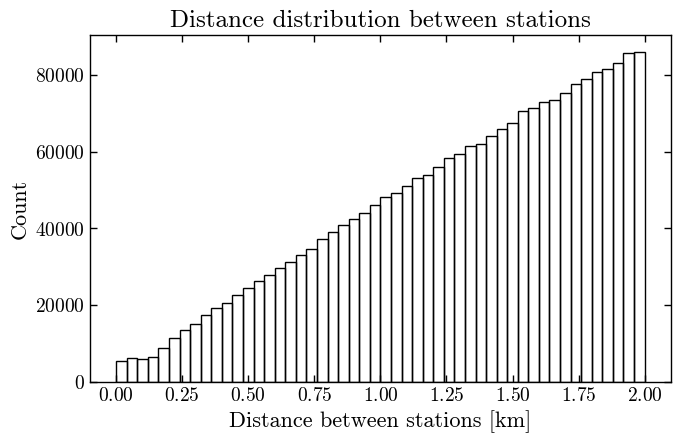

In [28]:
# Ensure counts matches bins[:-1]
counts2 = counts[:len(bins) - 1]

# Plot the histogram using the binned counts
plt.bar(bins[:-1], counts2, width=np.diff(bins), align='edge', facecolor='none', edgecolor='black')

# plt.plot(bins, counts)

plt.xlabel('Distance between stations [km]')
plt.ylabel('Count')
plt.title(hist_title)
plt.show()

# Generating random dots

In [29]:
# Generate random points within the map bounds
num_points = 5 * len(dx_km) #50000
print(num_points)
rng = np.random.RandomState(seed=42)

random_dx = np.random.uniform(np.min(dx_km), np.max(dx_km), num_points)
random_dy = np.random.uniform(np.min(dy_km), np.max(dy_km), num_points)

53120


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/2339986465.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_1688/2339986465.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


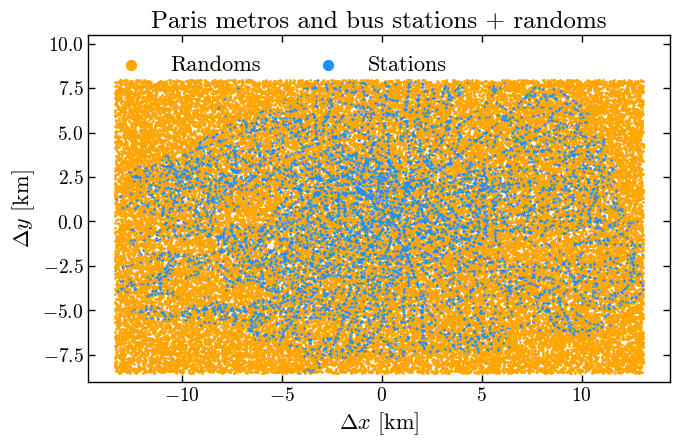

In [30]:
plt.scatter(random_dx, random_dy, color="orange", s=1, marker='o')
plt.scatter(dx_km, dy_km, color='dodgerblue', s=markersize, marker='.')

plt.ylim(np.min(dy_km)-0.5, np.max(dy_km)+2.5)

plt.scatter([], [], s=50, marker='o', color="orange", label="Randoms")
plt.scatter([], [], s=50,  marker='o', color='dodgerblue', label="Stations")
plt.legend(loc='upper left', ncol=2)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title(title + " + randoms")
plt.show()

In [5]:
import numpy as np

In [7]:
with np.load('counts_rand.csv') as f:
    print(f[0])

ValueError: This file contains pickled (object) data. If you trust the file you can load it unsafely using the `allow_pickle=` keyword argument or `pickle.load()`.

In [ ]:
if os.fchown(counts_rand.csv)
    positions_rand = np.column_stack((random_dx, random_dy))
    counts_rand = pair_count_2d(positions_rand, edges)
    np.savetxt("counts_rand.csv", counts_rand, delimiter=",")

100%|██████████| 53120/53120 [14:36<00:00, 60.61it/s]  


In [ ]:
# np.savetxt("counts_rand.csv", counts_rand, delimiter=",")

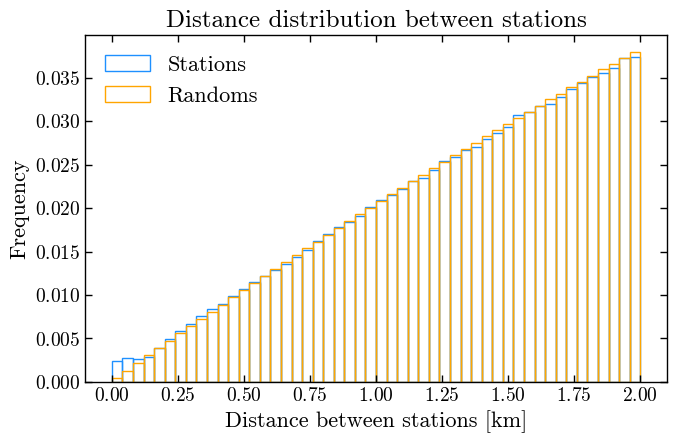

In [ ]:
counts_rand2 = counts_rand[:len(bins) - 1]

counts_norm = counts2 / np.sum(counts2)
counts_rand_norm = counts_rand[:len(bins) - 1] / np.sum(counts_rand[:len(bins) - 1])

plt.bar(bins[:-1], counts_norm, width=np.diff(bins),
        align='edge', facecolor='none', edgecolor='dodgerblue',
        label = "Stations")

plt.bar(bins[:-1], counts_rand_norm, width=np.diff(bins),
        align='edge', facecolor='none', edgecolor='orange',
        label="Randoms")

plt.xlabel('Distance between stations [km]')
plt.ylabel('Frequency')
plt.title(hist_title)
plt.legend()
plt.show()

In [ ]:
# Create 2D data histogram for station positions
hist, xedges, yedges = np.histogram2d(dx_km, dy_km, bins=20)
hist = hist / hist.max()  # Normalize to make it a probability

# Generate uniformly distributed randoms within the bounding box
nrandoms = len(dx_km) * 20
randoms_positions = np.column_stack([
    np.random.uniform(dx_km.min(), dx_km.max(), size=nrandoms),
    np.random.uniform(dy_km.min(), dy_km.max(), size=nrandoms)
])

# Bin randoms in the 2D space
xidx = np.digitize(randoms_positions[:, 0], bins=xedges) - 1
yidx = np.digitize(randoms_positions[:, 1], bins=yedges) - 1

# Downsample randoms to match the amplitude of the 2D data histogram
prob = np.random.uniform(0., 1., nrandoms)
mask = (xidx >= 0) & (xidx < hist.shape[0]) & (yidx >= 0) & (yidx < hist.shape[1]) & (prob < hist[xidx, yidx])
randoms_positions = randoms_positions[mask]

In [ ]:
random_foot_dx, random_foot_dy = randoms_positions[:, 0], randoms_positions[:, 1]

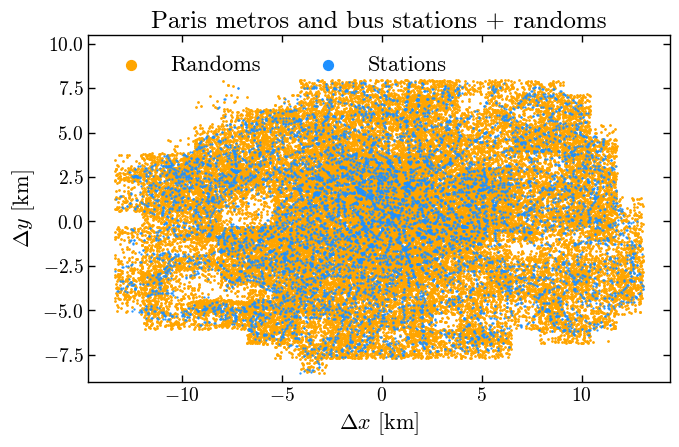

In [ ]:
plt.scatter(random_foot_dx, random_foot_dy, color="orange", s=1, marker='o')
plt.scatter(dx_km, dy_km, color='dodgerblue', s=markersize, marker='.')

plt.ylim(np.min(dy_km)-0.5, np.max(dy_km)+2.5)

plt.scatter([], [], s=50, marker='o', color="orange", label="Randoms")
plt.scatter([], [], s=50,  marker='o', color='dodgerblue', label="Stations")
plt.legend(loc='upper left', ncol=2)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title(title + " + randoms")
plt.show()

In [ ]:
positions_rand_foot = np.column_stack((random_foot_dx, random_foot_dy))
counts_rand_foot = pair_count_2d(positions_rand_foot, edges)

100%|██████████| 43238/43238 [09:39<00:00, 74.68it/s]  


In [ ]:
np.savetxt("counts_rand_foot.csv", counts_rand_foot, delimiter=",")

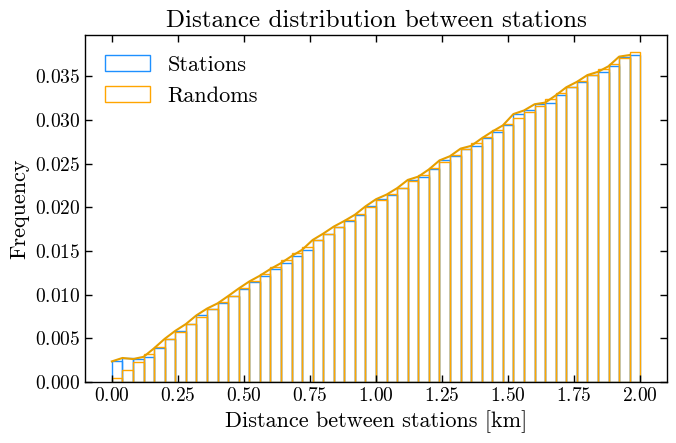

In [ ]:
counts_rand_foot2 = counts_rand_foot[:len(bins) - 1]

counts_norm = counts2 / np.sum(counts2)
counts_rand_foot_norm = counts_rand_foot[:len(bins) - 1] / np.sum(counts_rand_foot[:len(bins) - 1])

plt.bar(bins[:-1], counts_norm, width=np.diff(bins),
        align='edge', facecolor='none', edgecolor='dodgerblue',
        label = "Stations")

plt.bar(bins[:-1], counts_rand_foot_norm, width=np.diff(bins),
        align='edge', facecolor='none', edgecolor='orange',
        label="Randoms")

# plt.plot(bins[:-1], counts_norm)

plt.xlabel('Distance between stations [km]')
plt.ylabel('Frequency')
plt.title(hist_title)
plt.legend()
plt.show()

In [ ]:
corr_res = counts_norm / counts_rand_foot_norm - 1

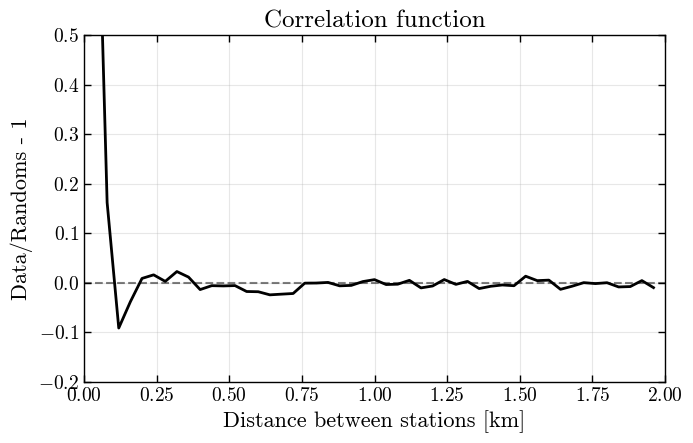

In [ ]:
plt.axline((bins[0], 0), (bins[-1], 0), color='k', linestyle='--', alpha=0.5)

plt.plot(bins[:-1], corr_res, color='k', lw=2)

plt.xlim(0,2)
plt.ylim(-0.2,0.5)

plt.xlabel('Distance between stations [km]')
plt.ylabel('Data/Randoms - 1')
plt.title("Correlation function")
# plt.legend()
plt.grid(alpha=0.3)
plt.show()